# Google Top Stories - An exploration

This dataset was collected during the pandemic, it contains headlines shown by Google Search.

The dataset is organized by year, month, date, hour, in a series of nested folders. The leaf folders contain JSON files with information about top stories. 

Your goal is to write first Python function that takes the name of the folder "GoogleTopStories" and stores the content of all the JSON files into a single CSV file. Once you have a CSV file, you can practice your pandas & seaborn skills in analyzing the data.

Some tips and ideas for analysis:
1. Use the Python command `os.walk` to iteratively traverse the nested subfolders. Account for hidden files that start with .
2. Although the dataset has a column domain, imagine that it doesn't have it and write a function that takes a URL and extract the domain name from it and saves it in a colum. Use the .apply method to create the column. Learn how to parse URLs with urllib.parse.
3. Create a bar chart with the frequencies of the top 10 domains. (Use domains, since 'source name' contains duplicates.)
4. Create a heatmap that shows the distribution of domains across the 'story_position' values.
5. Create timeseries of unique articles per month by query type. (This is challenging.)

In [50]:
import csv
import os
import json
import pandas as pd
from urllib.parse import urlparse
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:

def storejson(folder):
    content = []

    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.json'):
                with open(os.path.join(root, file), 'r') as f: # can't jusy say with open(file, 'r') becuase it doesn't inclide the path to the file. it is why you keep getting FileNotFoundError: [Errno 2] No such file or directory: 'Covid-19.json' 
                    data = json.load(f)
                    content.extend(data)  ##

    return pd.DataFrame(data)

storejson('GoogleTopStories')



,title,url,source,time,date,query,story_position,domain
0,UK Travelers Must Get A Negative Coronavirus T...,https://www.npr.org/sections/coronavirus-live-...,NPR,6 hours ago,2020-12-25 10:00:00,coronavirus test,1,www.npr.org
1,US Needs More Coronavirus Tests To Stop The Wi...,https://www.npr.org/sections/health-shots/2020...,NPR,3 days ago,2020-12-25 10:00:00,coronavirus test,2,www.npr.org
2,US requires negative coronavirus test from UK ...,https://www.theverge.com/2020/12/25/22199682/c...,The Verge,1 hour ago,2020-12-25 10:00:00,coronavirus test,3,www.theverge.com


In [39]:
def Domain(url):
    return urlparse(url).netloc #what is this doing? extracts the network location 


In [40]:
df=storejson('GoogleTopStories')

In [41]:
#write the data into the csv

df.to_csv('GoogleTopStories.csv', index=False)

In [ ]:
# How to get the domain from URL? use apply function 
df['domain'] = df['url'].apply(Domain) #  add it as a new column

In [42]:
#get the top 10 domain
domaincount = df['domain'].value_counts().head(10)

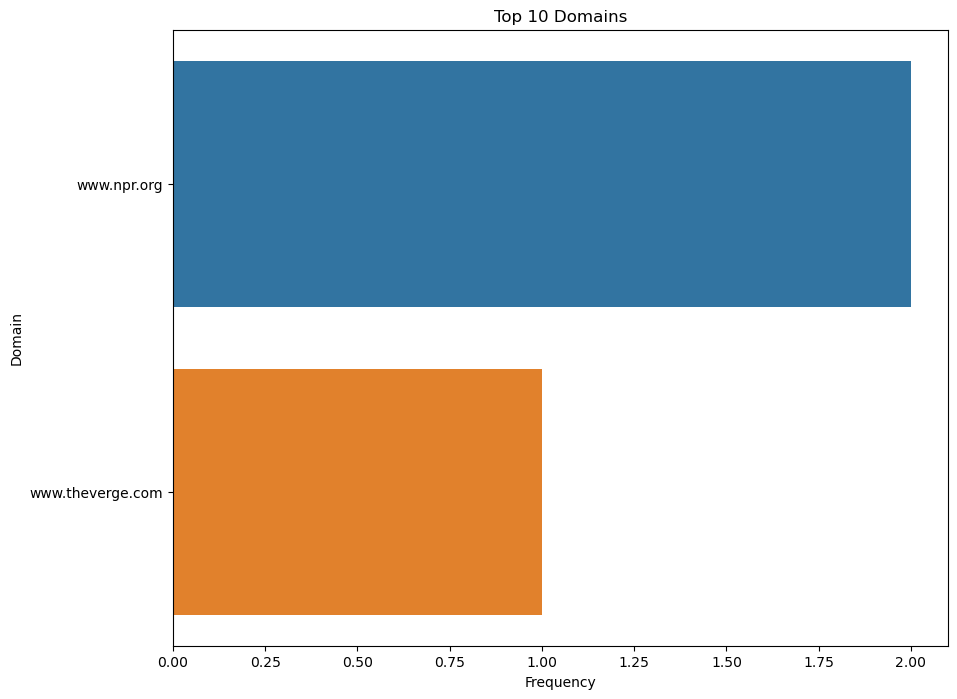

In [48]:
#bar plot 
plt.figure(figsize=(10,8))

fig = sns.barplot(x=domaincount.values, 
                  y=domaincount.index)
plt.title('Top 10 Domains')
plt.xlabel('Frequency')
plt.ylabel('Domain')
plt.show()



In [54]:
#Create a heatmap that shows the distribution of domains across the 'story_position' values
import csv

with open("GoogleTopStories.csv", "r") as infile:
    reader = csv.reader(infile)
    for row in reader:
        print(row)

    

['title', 'url', 'source', 'time', 'date', 'query', 'story_position', 'domain']
['UK Travelers Must Get A Negative Coronavirus Test Before Coming Into US : \nCoronavirus Updates', 'https://www.npr.org/sections/coronavirus-live-updates/2020/12/25/950218997/u-s-now-requires-all-u-k-travelers-to-have-a-negative-coronavirus-test', 'NPR', '6 hours ago', '2020-12-25 10:00:00', 'coronavirus test', '1', 'www.npr.org']
['US Needs More Coronavirus Tests To Stop The Winter Surge : Shots - Health \nNews', 'https://www.npr.org/sections/health-shots/2020/12/22/948085513/vaccines-are-coming-but-the-u-s-still-needs-more-testing-to-stop-the-surge', 'NPR', '3 days ago', '2020-12-25 10:00:00', 'coronavirus test', '2', 'www.npr.org']
['US requires negative coronavirus test from UK travelers', 'https://www.theverge.com/2020/12/25/22199682/covid-test-uk-travelers-us-cdc-virus-mutation', 'The Verge', '1 hour ago', '2020-12-25 10:00:00', 'coronavirus test', '3', 'www.theverge.com']


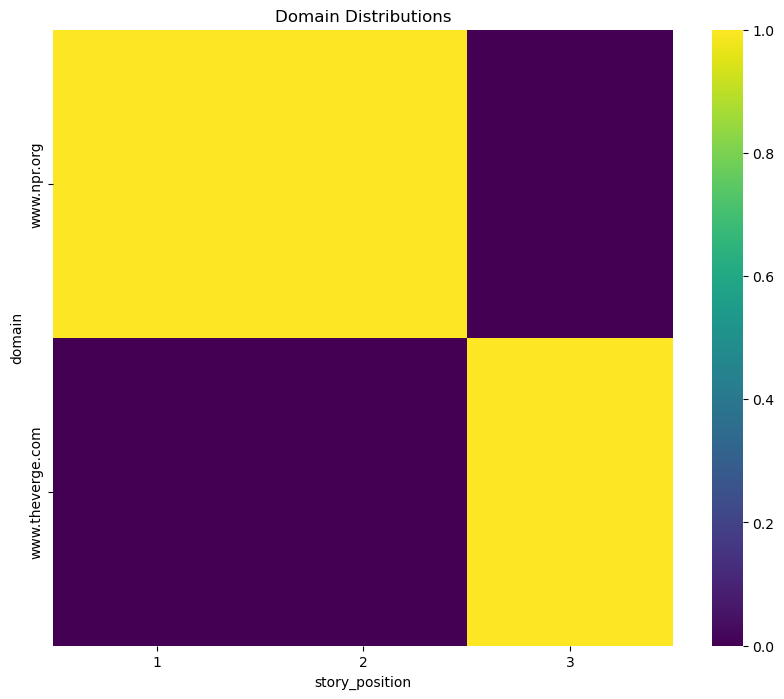

In [60]:
#matr = [row]
#matr

#fig5 = sns.heatmap(matr)

#Create a pivot table
matr = df.pivot_table(index='domain', columns='story_position', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matr, cmap='viridis')
plt.title('Domain Distributions')
plt.show()
    


In [59]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 